In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
train = pd.read_csv('C:\\Users\\uppup\\Documents\\Git Clones\\Machine-Learning\\Machine Learning Sections\\Logistic Regression\\titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

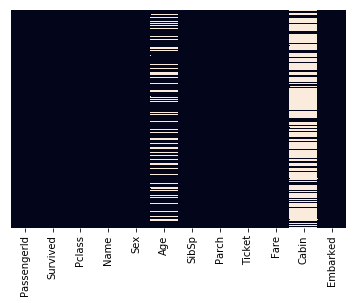

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

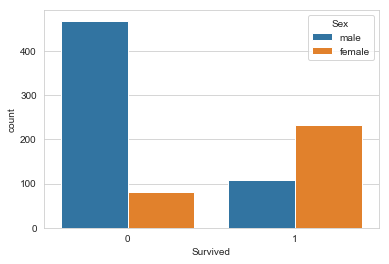

In [7]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Sex", data=train)

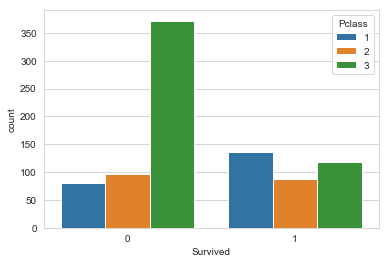

In [9]:

sns.countplot(x="Survived", hue="Pclass", data=train)

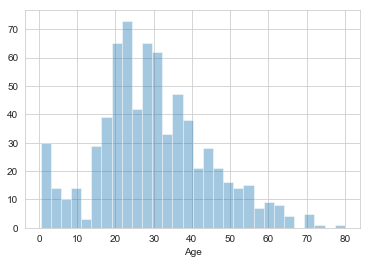

In [10]:
sns.distplot(train["Age"].dropna(), kde=False, bins=30)

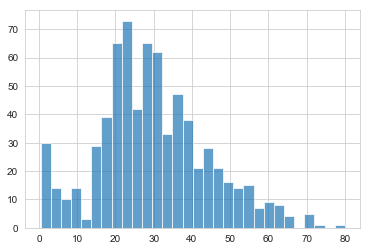

In [11]:
train['Age'].hist(bins=30, alpha=0.7)

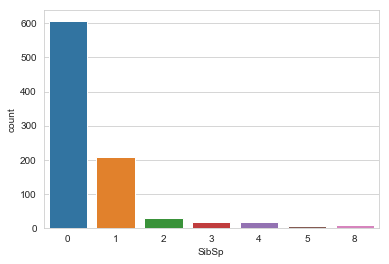

In [12]:
sns.countplot(x="SibSp", data=train)

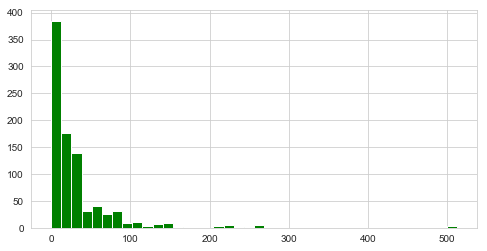

In [13]:
train["Fare"].hist(color='green', bins=40, figsize=(8,4))

In [14]:
import cufflinks as cf
cf.go_offline()

In [15]:
train["Fare"].iplot(kind="hist", bins=30, color='green')

In [32]:
# Data Cleaning

In [31]:
train[["Pclass", "Age"]].pivot(columns="Pclass", values="Age").iplot(kind="box")

In [33]:
# Filling values

In [40]:
def age_imputer(cols):
    Age= cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37 # mean of age at pclass 1
        
        if Pclass == 2:
            return 29 # mean of age at pclass 2

        if Pclass == 3:
            return 24 # mean of age at pclass 3
    
    else:
        return Age

In [41]:
train['Age'] = train[['Age', 'Pclass']].apply(age_imputer, axis=1)

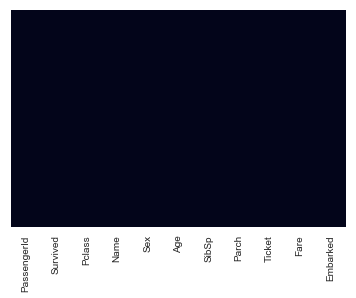

In [50]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False)

In [45]:
train.drop("Cabin", axis=1, inplace=True)

In [46]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [49]:
train.dropna(inplace=True)

In [60]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"], drop_first=True)

# train.drop(['male', 'Q', 'S'], axis=1, inplace=True)
train = pd.concat([train, sex, embark], axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [61]:
train.drop(['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket'], inplace=True, axis=1)

In [62]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [64]:
from sklearn.model_selection import train_test_split

In [70]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lm = LogisticRegression()

In [74]:
lm.fit(X_train, y_train)

C:\Users\uppup\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions = lm.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [78]:
from sklearn.metrics import confusion_matrix

In [0]:
print(confusion_matrix(y_test, predictions))